In [15]:
# -*- coding: utf-8 -*-

import time
import json
import requests
from datetime import datetime
import numpy as np
import matplotlib
import matplotlib.figure
from matplotlib.font_manager import FontProperties
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['font.sans-serif'] = ['FangSong']  # 设置默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时'-'显示为方块的问题

def catch_daily():
    """抓取每日确诊和死亡数据"""

    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_cn_day_counts&callback=&_=%d'%int(time.time()*1000)
    data = json.loads(requests.get(url=url).json()['data'])
    data.sort(key=lambda x:x['date'])

    date_list = list() # 日期
    confirm_list = list() # 确诊
    suspect_list = list() # 疑似
    dead_list = list() # 死亡
    heal_list = list() # 治愈
    for item in data:
        month, day = item['date'].split('.')
        date_list.append(datetime.strptime('2020-%s-%s'%(month, day), '%Y-%m-%d'))
        confirm_list.append(int(item['confirm']))
        suspect_list.append(int(item['suspect']))
        dead_list.append(int(item['dead']))
        heal_list.append(int(item['heal']))

    return date_list, confirm_list, suspect_list, dead_list, heal_list

def catch_distribution():
    """抓取行政区域确诊分布数据"""

    data = {'西藏':0}
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_area_counts&callback=&_=%d'%int(time.time()*1000)
    for item in json.loads(requests.get(url=url).json()['data']):
        if item['area'] not in data:
            data.update({item['area']:0})
        data[item['area']] += int(item['confirm'])

    return data

def plot_daily():
    """绘制每日确诊和死亡数据"""

    date_list, confirm_list, suspect_list, dead_list, heal_list = catch_daily() # 获取数据

    plt.figure('2019-nCoV疫情统计图表', facecolor='#f4f4f4', figsize=(10, 8))
    plt.title('2019-nCoV疫情曲线', fontsize=20)

    plt.plot(date_list, confirm_list, label='确诊')
    plt.plot(date_list, suspect_list, label='疑似')
    plt.plot(date_list, dead_list, label='死亡')
    plt.plot(date_list, heal_list, label='治愈')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) # 格式化时间轴标注
    plt.gcf().autofmt_xdate() # 优化标注（自动倾斜）
    plt.grid(linestyle=':') # 显示网格
    plt.legend(loc='best') # 显示图例
    plt.savefig('2019-nCoV疫情曲线.png') # 保存为文件
    #plt.show()

def plot_distribution():
    """绘制行政区域确诊分布数据"""

    data = catch_distribution()

    font = FontProperties(fname='res/simsun.ttf', size=14)
    lat_min = 0
    lat_max = 60
    lon_min = 70
    lon_max = 140

    handles = [
            matplotlib.patches.Patch(color='#ffaa85', alpha=1, linewidth=0),
            matplotlib.patches.Patch(color='#ff7b69', alpha=1, linewidth=0),
            matplotlib.patches.Patch(color='#bf2121', alpha=1, linewidth=0),
            matplotlib.patches.Patch(color='#7f1818', alpha=1, linewidth=0),
]
    labels = [ '1-9人', '10-99人', '100-999人', '>1000人']

    fig = matplotlib.figure.Figure()
    fig.set_size_inches(10, 8) # 设置绘图板尺寸
    axes = fig.add_axes((0.1, 0.12, 0.8, 0.8)) # rect = l,b,w,h
    m = Basemap(llcrnrlon=lon_min, urcrnrlon=lon_max, llcrnrlat=lat_min, urcrnrlat=lat_max, resolution='l', ax=axes)
    m.readshapefile('res/china-shapefiles-master/china', 'province', drawbounds=True)
    m.readshapefile('res/china-shapefiles-master/china_nine_dotted_line', 'section', drawbounds=True)
    m.drawcoastlines(color='black') # 洲际线
    m.drawcountries(color='black')  # 国界线
    m.drawparallels(np.arange(lat_min,lat_max,10), labels=[1,0,0,0]) #画经度线
    m.drawmeridians(np.arange(lon_min,lon_max,10), labels=[0,0,0,1]) #画纬度线

    for info, shape in zip(m.province_info, m.province):
        pname = info['OWNER'].strip('\x00')
        fcname = info['FCNAME'].strip('\x00')
        if pname != fcname: # 不绘制海岛
            continue

        for key in data.keys():
            if key in pname:
                if data[key] == 0:
                    color = '#f0f0f0'
                elif data[key] < 10:
                    color = '#ffaa85'
                elif data[key] <100:
                    color = '#ff7b69'
                elif  data[key] < 1000:
                    color = '#bf2121'
                else:
                    color = '#7f1818'
                break

        poly = Polygon(shape, facecolor=color, edgecolor=color)
        axes.add_patch(poly)

    axes.legend(handles, labels, bbox_to_anchor=(0.5, -0.11), loc='lower center', ncol=4, prop=font)
    axes.set_title("2019-nCoV疫情地图", fontproperties=font)
    FigureCanvasAgg(fig)
    fig.savefig('2019-nCoV疫情地图.png')

if __name__ == '__main__':
#     plot_daily()
    plot_distribution()

KeyError: 'data'

In [5]:
url = 'https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_area_counts&callback=&_=%d'%int(time.time()*1000)
r=requests.get(url=url)

In [6]:
print(r.status_code)

200


In [7]:
r.json()

{'ret': -2,
 'msg': ' err:get dict value failed, key:wuwei_ww_area_counts, ret: -1'}

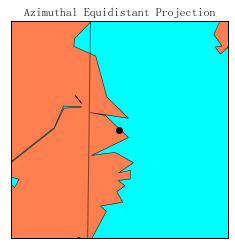

In [12]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
width = 1000000; lon_0 = 121.47; lat_0 = 31.27
m = Basemap(width=width,height=width,projection='aeqd',
            lat_0=lat_0,lon_0=lon_0)
# fill background.
m.drawmapboundary(fill_color='aqua')
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='coral',lake_color='aqua')
# 20 degree graticule.
m.drawparallels(np.arange(-80,81,20))
m.drawmeridians(np.arange(-180,180,20))
# draw a black dot at the center.
xpt, ypt = m(lon_0, lat_0)
m.plot([xpt],[ypt],'ko')
# draw the title.
plt.title('Azimuthal Equidistant Projection')
plt.show()